In [1]:
#%pip install matplotlib

In [2]:
import os
from glob import glob
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from plotnine import *
import statsmodels.api as sm
from statsmodels.formula.api import ols
from PIL import Image
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats



In [3]:
import sys
sys.version_info

sys.version_info(major=3, minor=7, micro=16, releaselevel='final', serial=0)

In [4]:
print('sns: {}'.format(sns.__version__))

sns: 0.12.2


In [5]:
#Create replacaments to assing classes to the raw data
#need to change this depending on what is in the output folder

plant_replacements = {
  r'.*BALD.*': 'BALDY',
  r'.*WT.*': 'BARLEYWT',
  r'.*W1_.*': 'W1_',
  r'.*W16_.*': 'W16_',
}

species_replacements = {
  r'.*BALD.*': 'BALDY',
  r'.*WT.*': 'BARLEYWT',
  r'.*W1_.*': 'WHEAT',
  r'.*W16_.*': 'WHEAT',
}




def find_between( s, first, last ):
    try:
        start = s.index( first ) + len( first )
        end = s.index( last, start )
        return s[start:end]
    except ValueError:
        return ""


#This is a quick hack on the above funstion (each data frame is per a plant so just take first row for labelling)
def add_plant_info_quick(df):
    dx = pd.DataFrame(df)
    dx=pd.DataFrame(dx.iloc[:1])
    #dx['ring'] = dx.filename.replace(ring_replacements, regex=True)
    #dx.loc[dx['ring'].str.contains('\.'), 'ring'] = 'other'
    #Assing Plant Values
    dx['plant'] = dx.filename.replace(plant_replacements, regex=True)
    dx.loc[dx['plant'].str.contains('\.'), 'plant'] = 'other'
    #Assing Species Values
    dx['species'] = dx.filename.replace(species_replacements, regex=True)
    dx.loc[dx['species'].str.contains('\.'), 'species'] = 'other'
    df = pd.DataFrame(df)
    df['plant']=(dx['plant']).iloc[0]
    df['species']=(dx['species']).iloc[0]
    #df['ring']=(dx['ring']).iloc[0]
    return df




In [6]:
os.chdir('E:\\ANSTO_20960\\rhizo_ai\\data_analysis\\')
pore_output_path="E:\\ANSTO_20960\\rhizo_ai\\\python_out_examples\\"
EXT = "*.csv"
all_csv_files = [file
                 for path, subdir, files in os.walk(pore_output_path)
                 for file in glob(os.path.join(path, EXT))]
csv_names=pd.DataFrame(all_csv_files)
csv_names.columns = ['csv_text_id']

In [7]:
# Mixed Volume 

mixed_vol_data_string=(["Mixed_INFO"])
mixed_vol_data_csv=csv_names[csv_names['csv_text_id'].str.contains('|'.join(mixed_vol_data_string))]

mixed_vol_df = []

for index, row in mixed_vol_data_csv.iterrows():
    df_i = pd.read_csv(row['csv_text_id'])
    df_i['filename'] = str(row['csv_text_id'])
    df_i["IMAGE_ID"] = find_between( str(df_i["filename"].iloc[0]), ".tif\\", ".tif" )
    df_i=add_plant_info_quick(df_i)
    mixed_vol_df.append(df_i)
    
mixed_vol_df = pd.concat(mixed_vol_df)
mixed_vol_df = mixed_vol_df.groupby(['IMAGE_ID', "plant", "species"],
              as_index=False).agg(Mixed_Volume_Voxel_Resolved= ('Mixed_Volume_Voxel_Resolved','sum'))
                                            
mixed_vol_df

,IMAGE_ID,plant,species,Mixed_Volume_Voxel_Resolved
0,recon_072_W16_S5_P,W16_,WHEAT,1.353896e+08
1,recon_073_W1_S5_P,W1_,WHEAT,8.019910e+08
2,recon_074_WT_S10_P,BARLEYWT,BARLEYWT,6.660906e+08
3,recon_076_W16_S4_P,W16_,WHEAT,2.516920e+08
4,recon_077_W1_S4_P,W1_,WHEAT,1.703166e+08
5,recon_078_WT_S7_P,BARLEYWT,BARLEYWT,1.651365e+09
6,recon_079_BALD_S1_P,BALDY,BALDY,7.105369e+08
7,recon_080_W16_S3_P,W16_,WHEAT,4.026296e+08
8,recon_081_W1_S2_P,W1_,WHEAT,1.364741e+08
9,recon_082_W1_S1_P,W1_,WHEAT,4.434082e+08


In [8]:
# Primary Volume 

primary_vol_data_string=(["Primary_INFO"])
primary_vol_data_csv=csv_names[csv_names['csv_text_id'].str.contains('|'.join(primary_vol_data_string))]

primary_vol_df = []

for index, row in primary_vol_data_csv.iterrows():
    df_i = pd.read_csv(row['csv_text_id'])
    df_i['filename'] = str(row['csv_text_id'])
    df_i["IMAGE_ID"] = find_between( str(df_i["filename"].iloc[0]), ".tif\\", ".tif" )
    df_i=add_plant_info_quick(df_i)
    primary_vol_df.append(df_i)
    
primary_vol_df = pd.concat(primary_vol_df)
primary_vol_df = primary_vol_df.groupby(['IMAGE_ID', "plant", "species"],
              as_index=False).agg(Primary_Volume_Voxel_Resolved= ('Primary_Volume_Voxel_Resolved','sum'))
                                            
primary_vol_df

,IMAGE_ID,plant,species,Primary_Volume_Voxel_Resolved
0,recon_072_W16_S5_P,W16_,WHEAT,1.983788e+08
1,recon_073_W1_S5_P,W1_,WHEAT,1.945137e+09
2,recon_074_WT_S10_P,BARLEYWT,BARLEYWT,1.019424e+09
3,recon_076_W16_S4_P,W16_,WHEAT,6.739598e+08
4,recon_077_W1_S4_P,W1_,WHEAT,2.665247e+08
5,recon_078_WT_S7_P,BARLEYWT,BARLEYWT,2.604537e+09
6,recon_079_BALD_S1_P,BALDY,BALDY,1.725943e+09
7,recon_080_W16_S3_P,W16_,WHEAT,1.125055e+09
8,recon_081_W1_S2_P,W1_,WHEAT,2.593878e+08
9,recon_082_W1_S1_P,W1_,WHEAT,8.781013e+08


In [9]:
# Root Volume 

root_vol_data_string=(["Root_INFO"])
root_vol_data_csv=csv_names[csv_names['csv_text_id'].str.contains('|'.join(root_vol_data_string))]

root_vol_df = []

for index, row in root_vol_data_csv.iterrows():
    df_i = pd.read_csv(row['csv_text_id'])
    df_i['filename'] = str(row['csv_text_id'])
    df_i["IMAGE_ID"] = find_between( str(df_i["filename"].iloc[0]), ".tif\\", ".tif" )
    df_i=add_plant_info_quick(df_i)
    root_vol_df.append(df_i)
    
root_vol_df = pd.concat(root_vol_df)
root_vol_df = root_vol_df.groupby(['IMAGE_ID', "plant", "species"],
              as_index=False).agg(Root_Volume_Voxel_Resolved= ('Root_Volume_Voxel_Resolved','sum'))
                                            
root_vol_df

,IMAGE_ID,plant,species,Root_Volume_Voxel_Resolved
0,recon_072_W16_S5_P,W16_,WHEAT,2.422045e+08
1,recon_073_W1_S5_P,W1_,WHEAT,1.731813e+08
2,recon_074_WT_S10_P,BARLEYWT,BARLEYWT,2.113006e+08
3,recon_076_W16_S4_P,W16_,WHEAT,1.240184e+08
4,recon_077_W1_S4_P,W1_,WHEAT,3.054356e+08
5,recon_078_WT_S7_P,BARLEYWT,BARLEYWT,5.898783e+08
6,recon_079_BALD_S1_P,BALDY,BALDY,2.194803e+08
7,recon_080_W16_S3_P,W16_,WHEAT,8.418236e+07
8,recon_081_W1_S2_P,W1_,WHEAT,1.879446e+08
9,recon_082_W1_S1_P,W1_,WHEAT,2.171743e+08


In [10]:
#Create master volume 
rhizo_trait_df=mixed_vol_df.merge(primary_vol_df, on=['IMAGE_ID', "plant", "species"], how='left')
rhizo_trait_df=rhizo_trait_df.merge(root_vol_df, on=['IMAGE_ID', "plant", "species"], how='left')

In [11]:
rhizo_trait_df["soil_volume"]=rhizo_trait_df["Mixed_Volume_Voxel_Resolved"]+rhizo_trait_df["Primary_Volume_Voxel_Resolved"]
#um of soil per um of root
rhizo_trait_df["rhizosheath"]=rhizo_trait_df["soil_volume"]/rhizo_trait_df["Root_Volume_Voxel_Resolved"]
rhizo_trait_df["rhizosheath_primary"]=rhizo_trait_df["Primary_Volume_Voxel_Resolved"]/rhizo_trait_df["Root_Volume_Voxel_Resolved"]
#percentage mixed
rhizo_trait_df["mixed_proportion"]=rhizo_trait_df["Mixed_Volume_Voxel_Resolved"]/rhizo_trait_df["soil_volume"]
#percentage primary
rhizo_trait_df["primary_proportion"]=rhizo_trait_df["Primary_Volume_Voxel_Resolved"]/rhizo_trait_df["soil_volume"]

In [12]:
rhizo_trait_df

,IMAGE_ID,plant,species,Mixed_Volume_Voxel_Resolved,Primary_Volume_Voxel_Resolved,Root_Volume_Voxel_Resolved,soil_volume,rhizosheath,rhizosheath_primary,mixed_proportion,primary_proportion
0,recon_072_W16_S5_P,W16_,WHEAT,1.353896e+08,1.983788e+08,2.422045e+08,3.337685e+08,1.378044,0.819055,0.405639,0.594361
1,recon_073_W1_S5_P,W1_,WHEAT,8.019910e+08,1.945137e+09,1.731813e+08,2.747128e+09,15.862728,11.231795,0.291938,0.708062
2,recon_074_WT_S10_P,BARLEYWT,BARLEYWT,6.660906e+08,1.019424e+09,2.113006e+08,1.685515e+09,7.976856,4.824521,0.395185,0.604815
3,recon_076_W16_S4_P,W16_,WHEAT,2.516920e+08,6.739598e+08,1.240184e+08,9.256518e+08,7.463824,5.434352,0.271908,0.728092
4,recon_077_W1_S4_P,W1_,WHEAT,1.703166e+08,2.665247e+08,3.054356e+08,4.368413e+08,1.430224,0.872605,0.389882,0.610118
5,recon_078_WT_S7_P,BARLEYWT,BARLEYWT,1.651365e+09,2.604537e+09,5.898783e+08,4.255902e+09,7.214881,4.415380,0.388018,0.611982
6,recon_079_BALD_S1_P,BALDY,BALDY,7.105369e+08,1.725943e+09,2.194803e+08,2.436480e+09,11.101131,7.863770,0.291624,0.708376
7,recon_080_W16_S3_P,W16_,WHEAT,4.026296e+08,1.125055e+09,8.418236e+07,1.527684e+09,18.147318,13.364492,0.263556,0.736444
8,recon_081_W1_S2_P,W1_,WHEAT,1.364741e+08,2.593878e+08,1.879446e+08,3.958619e+08,2.106269,1.380129,0.344752,0.655248
9,recon_082_W1_S1_P,W1_,WHEAT,4.434082e+08,8.781013e+08,2.171743e+08,1.321509e+09,6.085017,4.043302,0.335532,0.664468


In [13]:
rhizo_trait_df.to_csv("rhizo_trait_df.csv")

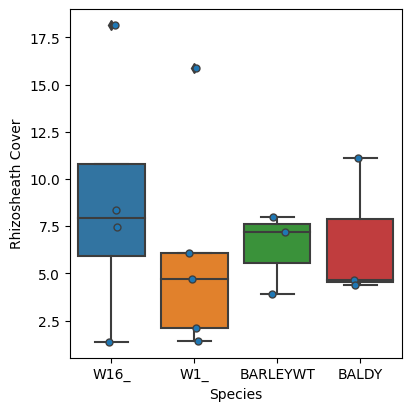

In [14]:
plt.figure(figsize=(4,4), constrained_layout=True)
plot=sns.boxplot(data=rhizo_trait_df, x="plant", y="rhizosheath");
plt.ylabel("Rhizosheath Cover");
plt.xlabel("Species");
sns.stripplot(x="plant", y="rhizosheath", data=rhizo_trait_df, dodge=True,ax=plot,   linewidth=1);
#plot.set(title='Rhizosheath mass per root mass');
plt.savefig('Rhizosheath Cover.png', bbox_inches='tight')

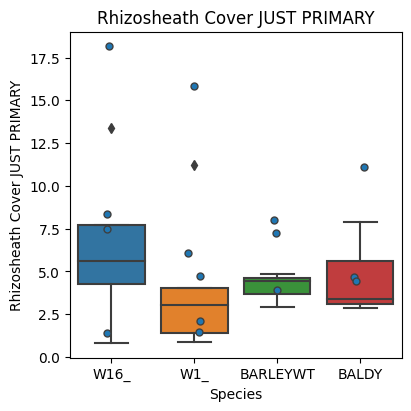

In [15]:
plt.figure(figsize=(4,4), constrained_layout=True)
plot=sns.boxplot(data=rhizo_trait_df, x="plant", y="rhizosheath_primary");
plt.ylabel("Rhizosheath Cover JUST PRIMARY");
plt.xlabel("Species");
sns.stripplot(x="plant", y="rhizosheath", data=rhizo_trait_df, dodge=True,ax=plot,   linewidth=1);
plot.set(title='Rhizosheath Cover JUST PRIMARY');
plt.savefig('Rhizosheath Cover.png', bbox_inches='tight')

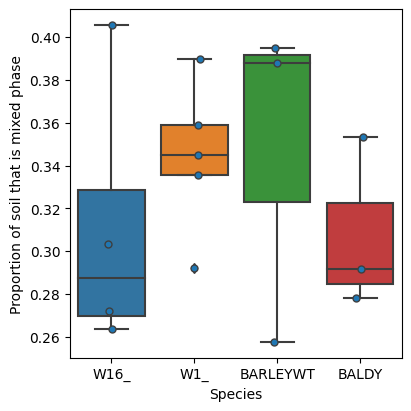

In [16]:
plt.figure(figsize=(4,4), constrained_layout=True)
plot=sns.boxplot(data=rhizo_trait_df, x="plant", y="mixed_proportion");
sns.stripplot(x="plant", y="mixed_proportion", data=rhizo_trait_df, dodge=True,ax=plot,   linewidth=1);
plt.ylabel("Proportion of soil that is mixed phase");
plt.xlabel("Species");
#plot.set(title='mixed_proportion (soil % that is mixed phase)');
plt.savefig('mixed_proportion.png', bbox_inches='tight')

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X=np.array(rhizo_trait_df["mixed_proportion"]).reshape((-1, 1))
y=np.array(rhizo_trait_df["rhizosheath"])
model = LinearRegression().fit(X, y)
r_sq = model.score(X, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.2655555881159585


In [18]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     4.700
Date:                Thu, 23 May 2024   Prob (F-statistic):             0.0493
Time:                        15:05:42   Log-Likelihood:                -42.307
No. Observations:                  15   AIC:                             88.61
Df Residuals:                      13   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.9511      7.447      3.082      0.0

C:\Users\richa\AppData\Local\anaconda3\envs\soil_seg\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15


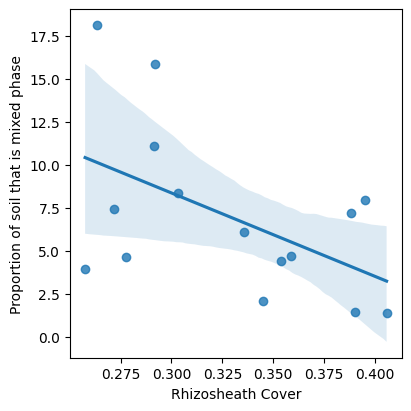

In [19]:
plt.figure(figsize=(4,4), constrained_layout=True)
plot=sns.regplot(data=rhizo_trait_df, x="mixed_proportion", y="rhizosheath");
plt.ylabel("Proportion of soil that is mixed phase");
plt.xlabel("Rhizosheath Cover");
plt.savefig('rhizo_mixed_cover.png', bbox_inches='tight')

#plot.set(title='mixed_proportion vs rhizosheath');

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x=np.array(rhizo_trait_df["primary_proportion"]).reshape((-1, 1))
y=np.array(rhizo_trait_df["rhizosheath"])
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.2655555881159585


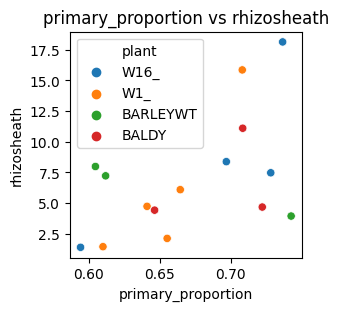

In [21]:
plt.figure(figsize=(3,3), constrained_layout=True)
plot=sns.scatterplot(data=rhizo_trait_df, x="primary_proportion", y="rhizosheath", hue="plant");
plot.set(title='primary_proportion vs rhizosheath');

In [22]:
# touching
touching_data_string=str("distance_root_to_air")
touching_data_csv=csv_names[csv_names['csv_text_id'].str.contains(touching_data_string)]

touching_data_df = []

for index, row in touching_data_csv.iterrows():
    df_i = pd.read_csv(row['csv_text_id'])
    df_i['filename'] = str(row['csv_text_id'])
    df_i["IMAGE_ID"] = find_between( str(df_i["filename"].iloc[0]), ".tif\\", ".tif" )
    df_i=add_plant_info_quick(df_i)
    touching_data_df.append(df_i)
    
touching_data_df = pd.concat(touching_data_df)

In [23]:
min_distance= touching_data_df['Distance'].min()
touching_data_df['touching'] = np.where(touching_data_df['Distance']!= min_distance, "Not Touching Air", "Touching Air")
touching_data_df_agg=touching_data_df.groupby(['IMAGE_ID', "plant", "species",'touching']).size().reset_index(name='counts')
#Terrible solution 
touching_data_df_agg_d1=touching_data_df_agg.query('touching== "Touching Air"')
touching_data_df_agg_d1.rename(columns={'counts':'touching_air_counts'}, inplace=True)
touching_data_df_agg_d2=touching_data_df_agg.query('touching== "Not Touching Air"')
touching_data_df_agg_d2.rename(columns={'counts':'not_touching_air_counts'}, inplace=True)
touch_df_sns=touching_data_df_agg_d1.merge(touching_data_df_agg_d2, on=['IMAGE_ID', "plant", "species"], how='left')
touch_df_sns["proportion_touching_air"]=touch_df_sns['touching_air_counts']/(touch_df_sns['touching_air_counts']+touch_df_sns['not_touching_air_counts'])

C:\Users\richa\AppData\Local\anaconda3\envs\soil_seg\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


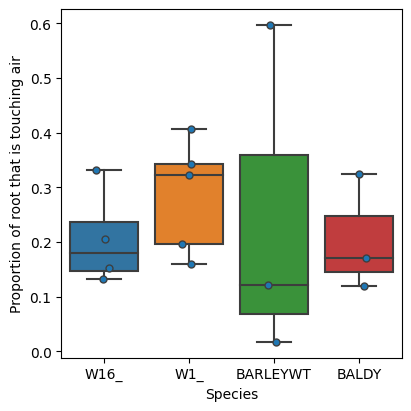

In [24]:
plt.figure(figsize=(4,4), constrained_layout=True)
plot=sns.boxplot(data=touch_df_sns, x="plant", y="proportion_touching_air")
sns.stripplot(x="plant", y="proportion_touching_air",data=touch_df_sns,ax=plot, dodge=True,  linewidth=1)
#plot.set(title='proportion_touching_air');
plt.ylabel("Proportion of root that is touching air");
plt.xlabel("Species");
plt.savefig('proportion_touching_air.png', bbox_inches='tight')

In [25]:
touch_df_sns

,IMAGE_ID,plant,species,touching_x,touching_air_counts,touching_y,not_touching_air_counts,proportion_touching_air
0,recon_072_W16_S5_P,W16_,WHEAT,Touching Air,46665,Not Touching Air,306909,0.131981
1,recon_073_W1_S5_P,W1_,WHEAT,Touching Air,98034,Not Touching Air,206124,0.322313
2,recon_074_WT_S10_P,BARLEYWT,BARLEYWT,Touching Air,4983,Not Touching Air,281178,0.017413
3,recon_076_W16_S4_P,W16_,WHEAT,Touching Air,72815,Not Touching Air,147180,0.330985
4,recon_077_W1_S4_P,W1_,WHEAT,Touching Air,151736,Not Touching Air,291337,0.342463
5,recon_078_WT_S7_P,BARLEYWT,BARLEYWT,Touching Air,98430,Not Touching Air,713466,0.121235
6,recon_079_BALD_S1_P,BALDY,BALDY,Touching Air,51797,Not Touching Air,250313,0.171451
7,recon_080_W16_S3_P,W16_,WHEAT,Touching Air,25633,Not Touching Air,141788,0.153105
8,recon_081_W1_S2_P,W1_,WHEAT,Touching Air,52151,Not Touching Air,272713,0.160532
9,recon_082_W1_S1_P,W1_,WHEAT,Touching Air,137010,Not Touching Air,199634,0.406988


In [26]:
df_touch_rhizo=touch_df_sns.merge(rhizo_trait_df, on=['IMAGE_ID', "plant", "species"], how='left')

In [27]:
df_touch_rhizo

,IMAGE_ID,plant,species,touching_x,touching_air_counts,touching_y,not_touching_air_counts,proportion_touching_air,Mixed_Volume_Voxel_Resolved,Primary_Volume_Voxel_Resolved,Root_Volume_Voxel_Resolved,soil_volume,rhizosheath,rhizosheath_primary,mixed_proportion,primary_proportion
0,recon_072_W16_S5_P,W16_,WHEAT,Touching Air,46665,Not Touching Air,306909,0.131981,1.353896e+08,1.983788e+08,2.422045e+08,3.337685e+08,1.378044,0.819055,0.405639,0.594361
1,recon_073_W1_S5_P,W1_,WHEAT,Touching Air,98034,Not Touching Air,206124,0.322313,8.019910e+08,1.945137e+09,1.731813e+08,2.747128e+09,15.862728,11.231795,0.291938,0.708062
2,recon_074_WT_S10_P,BARLEYWT,BARLEYWT,Touching Air,4983,Not Touching Air,281178,0.017413,6.660906e+08,1.019424e+09,2.113006e+08,1.685515e+09,7.976856,4.824521,0.395185,0.604815
3,recon_076_W16_S4_P,W16_,WHEAT,Touching Air,72815,Not Touching Air,147180,0.330985,2.516920e+08,6.739598e+08,1.240184e+08,9.256518e+08,7.463824,5.434352,0.271908,0.728092
4,recon_077_W1_S4_P,W1_,WHEAT,Touching Air,151736,Not Touching Air,291337,0.342463,1.703166e+08,2.665247e+08,3.054356e+08,4.368413e+08,1.430224,0.872605,0.389882,0.610118
5,recon_078_WT_S7_P,BARLEYWT,BARLEYWT,Touching Air,98430,Not Touching Air,713466,0.121235,1.651365e+09,2.604537e+09,5.898783e+08,4.255902e+09,7.214881,4.415380,0.388018,0.611982
6,recon_079_BALD_S1_P,BALDY,BALDY,Touching Air,51797,Not Touching Air,250313,0.171451,7.105369e+08,1.725943e+09,2.194803e+08,2.436480e+09,11.101131,7.863770,0.291624,0.708376
7,recon_080_W16_S3_P,W16_,WHEAT,Touching Air,25633,Not Touching Air,141788,0.153105,4.026296e+08,1.125055e+09,8.418236e+07,1.527684e+09,18.147318,13.364492,0.263556,0.736444
8,recon_081_W1_S2_P,W1_,WHEAT,Touching Air,52151,Not Touching Air,272713,0.160532,1.364741e+08,2.593878e+08,1.879446e+08,3.958619e+08,2.106269,1.380129,0.344752,0.655248
9,recon_082_W1_S1_P,W1_,WHEAT,Touching Air,137010,Not Touching Air,199634,0.406988,4.434082e+08,8.781013e+08,2.171743e+08,1.321509e+09,6.085017,4.043302,0.335532,0.664468


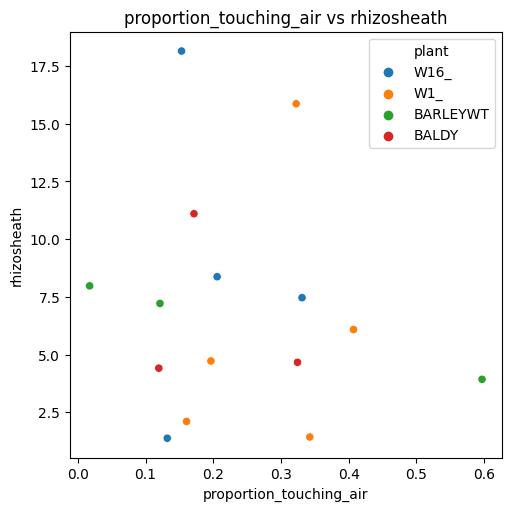

In [28]:
plt.figure(figsize=(5,5), constrained_layout=True)
plot=sns.scatterplot(data=df_touch_rhizo, x="proportion_touching_air", y="rhizosheath", hue="plant");
plot.set(title='proportion_touching_air vs rhizosheath');

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X=np.array(df_touch_rhizo["proportion_touching_air"]).reshape((-1, 1))
y=np.array(df_touch_rhizo["rhizosheath"])
model = LinearRegression().fit(X, y)
r_sq = model.score(X, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.01879556527923354


In [30]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.057
Method:                 Least Squares   F-statistic:                    0.2490
Date:                Thu, 23 May 2024   Prob (F-statistic):              0.626
Time:                        15:06:26   Log-Likelihood:                -44.480
No. Observations:                  15   AIC:                             92.96
Df Residuals:                      13   BIC:                             94.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.0956      2.567      3.153      0.0

C:\Users\richa\AppData\Local\anaconda3\envs\soil_seg\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15


In [31]:
def add_plant_info_quick_ring(df):
    dx = pd.DataFrame(df)
    dx=pd.DataFrame(dx.iloc[:1])
    dx['ring'] = dx.filename.replace(ring_replacements, regex=True)
    #dx.loc[dx['ring'].str.contains('\.'), 'ring'] = 'other'
    #Assing Plant Values
    dx['plant'] = dx.filename.replace(plant_replacements, regex=True)
    dx.loc[dx['plant'].str.contains('\.'), 'plant'] = 'other'
    #Assing Species Values
    dx['species'] = dx.filename.replace(species_replacements, regex=True)
    dx.loc[dx['species'].str.contains('\.'), 'species'] = 'other'
    df = pd.DataFrame(df)
    df['plant']=(dx['plant']).iloc[0]
    df['species']=(dx['species']).iloc[0]
    df['ring']=(dx['ring']).iloc[0]
    return df

ring_replacements = {
  r'.*_50.*': '0.14mm',
  r'.*_100.*': '0.28mm',
  r'.*_150.*': '0.42mm',
  r'.*_200.*': '0.56mm',
  r'.*_250.*': '0.7mm',
}



In [32]:
#Pore Data
# Pore Volume 

pore_data_string=(["Rhizosheath_PORE_INFO"])
pore_data_csv=csv_names[csv_names['csv_text_id'].str.contains('|'.join(pore_data_string))]

pore_data_df = []

for index, row in pore_data_csv.iterrows():
    df_i = pd.read_csv(row['csv_text_id'])
    df_i['filename'] = str(row['csv_text_id'])
    df_i["IMAGE_ID"] = find_between( str(df_i["filename"].iloc[0]), ".tif\\", ".tif" )
    df_i=add_plant_info_quick_ring(df_i)
    pore_data_df.append(df_i)

pore_data_df = pd.concat(pore_data_df)

In [33]:
#rhizosheath data

rhizosheath_data_string=(["Rhizosheath_INFO"])
rhizosheath_data_csv=csv_names[csv_names['csv_text_id'].str.contains('|'.join(rhizosheath_data_string))]

rhizosheath_data_df = []

for index, row in rhizosheath_data_csv.iterrows():
    df_i = pd.read_csv(row['csv_text_id'])
    df_i['filename'] = str(row['csv_text_id'])
    df_i["IMAGE_ID"] = find_between( str(df_i["filename"].iloc[0]), ".tif\\", ".tif" )
    df_i=add_plant_info_quick_ring(df_i)
    rhizosheath_data_df.append(df_i)

rhizosheath_data_df = pd.concat(rhizosheath_data_df)

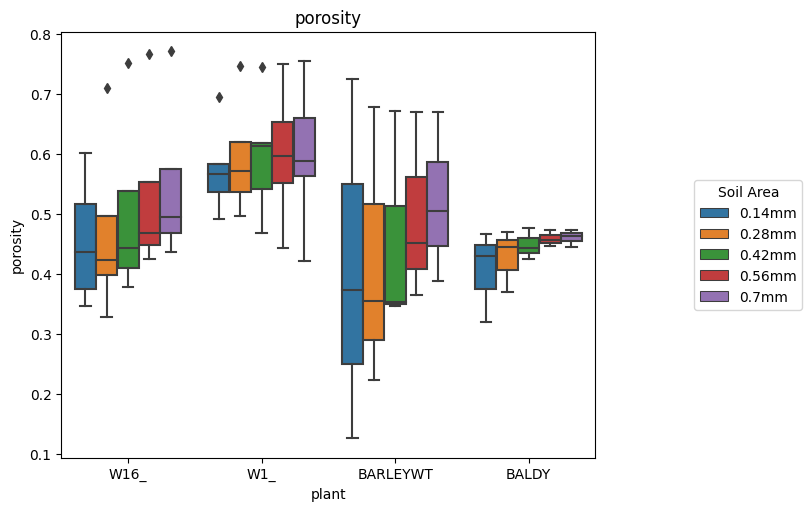

In [34]:
porosity_df=pore_data_df.merge(rhizosheath_data_df, on=['IMAGE_ID', "plant", "species","ring"], how='left')
porosity_df["porosity"]=porosity_df["PORE_rhizo_Volume_Voxel_Resolved"]/porosity_df["Rhizosheath_Volume_Voxel_Resolved"]

hue_order  = ['0.14mm', '0.28mm', '0.42mm','0.56mm', '0.7mm']

plt.figure(figsize=(8,5), constrained_layout=True)
plot=sns.boxplot(data=porosity_df, x="plant", y="porosity",hue="ring",hue_order=hue_order);
#sns.stripplot(x="plant", y="porosity", hue="ring", data=porosity_df, dodge=True,ax=plot,   linewidth=1,hue_order=hue_order);
plot.set(title='porosity');
handles, labels = plot.get_legend_handles_labels();
plot.legend(handles[:5], labels[:5], title='Soil Area', bbox_to_anchor=(1.4,0.5), loc='right');

plt.savefig('porosity.png')


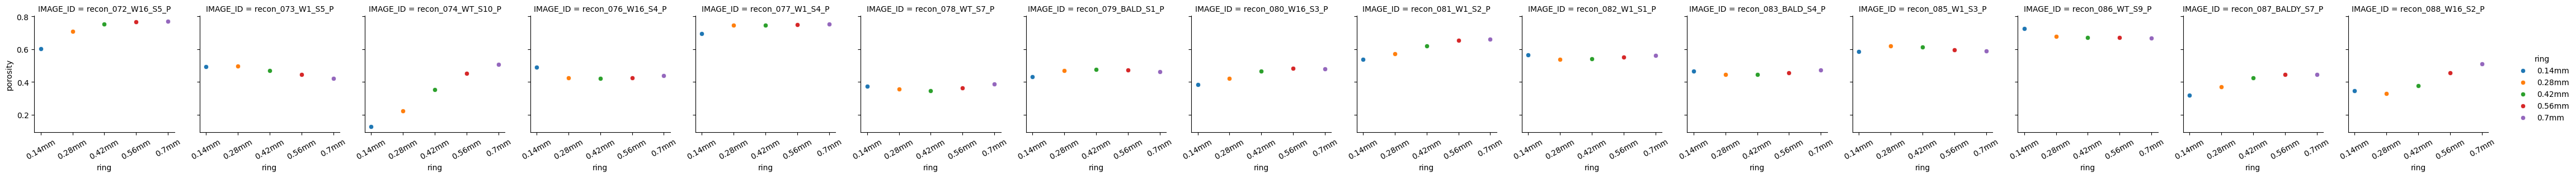

In [35]:

hue_order  = ['0.14mm', '0.28mm', '0.42mm','0.56mm', '0.7mm']
g = sns.FacetGrid(porosity_df, col="IMAGE_ID", hue="ring",hue_order=hue_order)
g.map_dataframe(sns.scatterplot, x="ring", y="porosity")
g.set_xticklabels(rotation=30)
g.add_legend()

In [36]:
# TAU-3D
tau_data_string=str("rw_pd")
tau_data_csv=csv_names[csv_names['csv_text_id'].str.contains(tau_data_string)]

tau_data_df = []

for index, row in tau_data_csv.iterrows():
    df_i = pd.read_csv(row['csv_text_id'])
    df_i['filename'] = str(row['csv_text_id'])
    df_i["IMAGE_ID"] = find_between( str(df_i["filename"].iloc[0]), ".tif\\", ".tif" )
    df_i=add_plant_info_quick_ring(df_i)
    tau_data_df.append(df_i)
    
tau_data_df = pd.concat(tau_data_df)
tau_data_df.rename(columns={'0':'TAU_3D'}, inplace=True)
tau_data_df.rename(columns={'1':'MSD_ID'}, inplace=True)

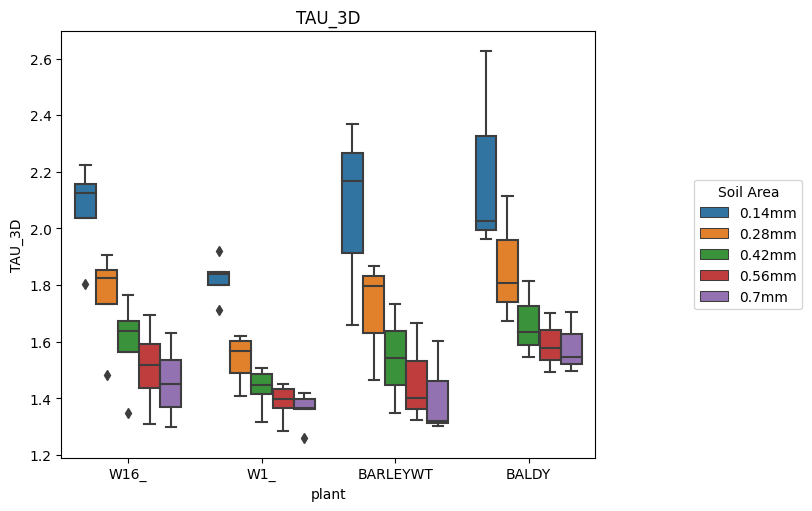

In [61]:
tau_data_df_overall=tau_data_df.query('MSD_ID == "msd_all_axis"')
hue_order  = ['0.14mm', '0.28mm', '0.42mm','0.56mm', '0.7mm']

plt.figure(figsize=(8,5), constrained_layout=True)
plot=sns.boxplot(data=tau_data_df_overall, x="plant", y="TAU_3D",hue="ring",hue_order=hue_order);
#sns.stripplot(x="plant", y="porosity", hue="ring", data=porosity_df, dodge=True,ax=plot,   linewidth=1,hue_order=hue_order);
plot.set(title='TAU_3D');
handles, labels = plot.get_legend_handles_labels();
plot.legend(handles[:5], labels[:5], title='Soil Area', bbox_to_anchor=(1.4,0.5), loc='right');

plt.savefig('porosity.png')


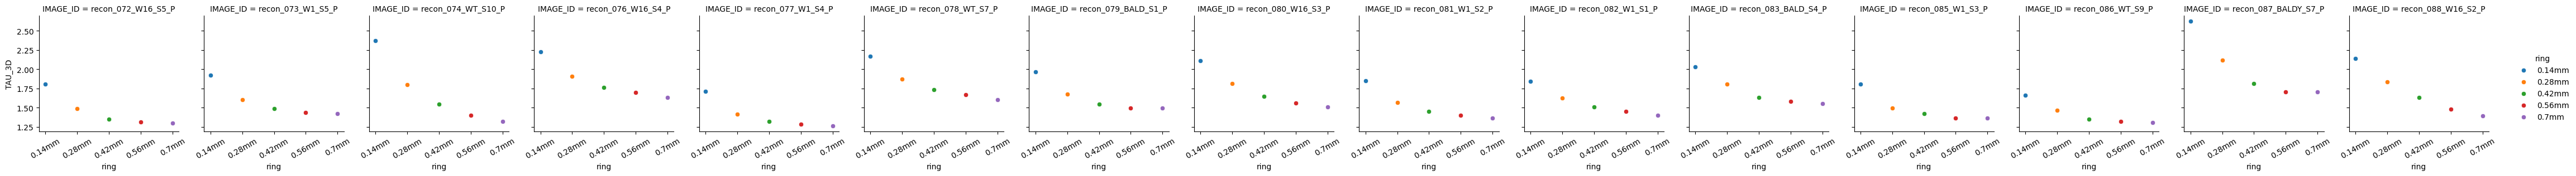

In [62]:
hue_order  = ['0.14mm', '0.28mm', '0.42mm','0.56mm', '0.7mm']
tau_data_df_overall=tau_data_df.query('MSD_ID == "msd_all_axis"')
g = sns.FacetGrid(tau_data_df_overall, col="IMAGE_ID", hue="ring",hue_order=hue_order)
g.map_dataframe(sns.scatterplot, x="ring", y="TAU_3D")
g.set_xticklabels(rotation=30)
g.add_legend()

In [63]:
#recon_077_W1_S4_P.tif_250__3D_pore_rhizo 
tau_and_pore_df=porosity_df.merge(tau_data_df_overall, on=['IMAGE_ID', "plant", "species","ring"], how='left')
tau_and_pore_df_eg=tau_and_pore_df[tau_and_pore_df['IMAGE_ID'].str.contains("recon_077_W1_S4_P")]

In [64]:
tau_and_pore_df_eg

,Unnamed: 0_x,Label_x,Area_Pixels_x,PORE_rhizo_Volume_Voxel_Resolved,filename_x,IMAGE_ID,plant,species,ring,Unnamed: 0_y,Label_y,Area_Pixels_y,Rhizosheath_Volume_Voxel_Resolved,filename_y,porosity,Unnamed: 0,TAU_3D,MSD_ID,filename
20,0,1,46516968,1.021140e+09,E:\ANSTO_20960\rhizo_ai\\python_out_examples\r...,recon_077_W1_S4_P,W1_,WHEAT,0.28mm,0,1,62324270,1.368142e+09,E:\ANSTO_20960\rhizo_ai\\python_out_examples\r...,0.746370,0,1.410149,msd_all_axis,E:\ANSTO_20960\rhizo_ai\\python_out_examples\r...
21,0,1,67297751,1.477320e+09,E:\ANSTO_20960\rhizo_ai\\python_out_examples\r...,recon_077_W1_S4_P,W1_,WHEAT,0.42mm,0,1,90239588,1.980939e+09,E:\ANSTO_20960\rhizo_ai\\python_out_examples\r...,0.745767,0,1.317544,msd_all_axis,E:\ANSTO_20960\rhizo_ai\\python_out_examples\r...
22,0,1,81782049,1.795280e+09,E:\ANSTO_20960\rhizo_ai\\python_out_examples\r...,recon_077_W1_S4_P,W1_,WHEAT,0.56mm,0,1,108971466,2.392142e+09,E:\ANSTO_20960\rhizo_ai\\python_out_examples\r...,0.750490,0,1.285345,msd_all_axis,E:\ANSTO_20960\rhizo_ai\\python_out_examples\r...
23,0,1,90316918,1.982637e+09,E:\ANSTO_20960\rhizo_ai\\python_out_examples\r...,recon_077_W1_S4_P,W1_,WHEAT,0.7mm,0,1,119715234,2.627989e+09,E:\ANSTO_20960\rhizo_ai\\python_out_examples\r...,0.754431,0,1.259332,msd_all_axis,E:\ANSTO_20960\rhizo_ai\\python_out_examples\r...
24,0,1,20166287,4.426903e+08,E:\ANSTO_20960\rhizo_ai\\python_out_examples\r...,recon_077_W1_S4_P,W1_,WHEAT,0.14mm,0,1,28989877,6.363858e+08,E:\ANSTO_20960\rhizo_ai\\python_out_examples\r...,0.695632,0,1.713677,msd_all_axis,E:\ANSTO_20960\rhizo_ai\\python_out_examples\r...


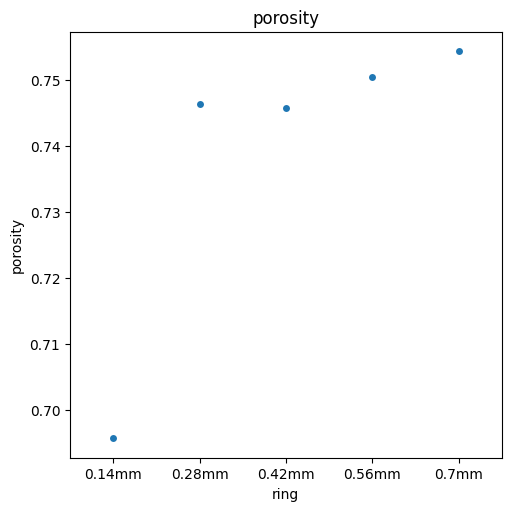

In [65]:
plt.figure(figsize=(5,5), constrained_layout=True)
plot=sns.stripplot(data=tau_and_pore_df_eg, x="ring", y="porosity",order=hue_order);
#sns.stripplot(x="species", y="porosity", hue="ring", data=porosity_df, dodge=True,ax=plot,   linewidth=1);
plot.set(title='porosity');
#handles, labels = plot.get_legend_handles_labels();
#plot.legend(handles[:5], labels[:5], title='Soil Area', bbox_to_anchor=(1.4,0.5), loc='right');

In [ ]:
# with pd.option_context('display.max_colwidth', None):
#   display(pore_data_df['filename'])
